In [1]:
# here is how we activate an environment in our current directory
import Pkg; Pkg.activate(@__DIR__)

# instantate this environment (download packages if you haven't)
Pkg.instantiate();

using Test, LinearAlgebra
import ForwardDiff as FD 
import FiniteDiff as FD2 
using Plots

  Activating project at `c:\Users\zsqu4re\Desktop\OCRL\Optimal-Control-and-Reinforcement-Learning\hw0\HW0_S25`


# Q2: Newton's Method (20 pts)

## Part (a): Newton's method in 1 dimension (8pts)
First let's look at a nonlinear function, and label where this function is equal to 0 (a root of the function).

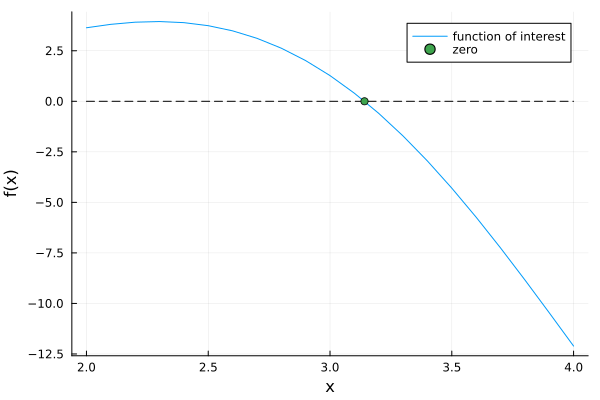

In [2]:
let 
    x = 2:0.1:4;
    y = sin.(x) .* x.^2
    plot(x,y,label = "function of interest")
    plot!(x,0*x,linestyle = :dash, color = :black,label = "")
    xlabel!("x")
    ylabel!("f(x)")
    scatter!([pi],[0],label = "zero")
end

We are now going to use Newton's method to numerically evaluate the argument $x$ where this function is equal to zero. To make this more general, let's define a residual function,
$$ r(x) = \sin(x)x^2. $$
We want to drive this residual function to be zero (aka find a root to $r(x)$). To do this, we start with an initial guess at $x_k$, and approximate our residual function with a first-order Taylor expansion:
$$ r(x_k + \Delta x) \approx r(x_k) + \bigg[ \frac{\partial r}{\partial x}\bigg\rvert_{x_k} \bigg] \Delta x. $$ 
We now want to find the root of this linear approximation. In other words, we want to find a $\Delta x$ such that $r(x_k + \Delta x) = 0$. To do this, we simply re-arrange:
$$ \Delta x = -\bigg[ \frac{\partial r}{\partial x}\bigg\rvert_{x_k} \bigg]^{-1}r(x_k). $$ 
We can now increment our estimate of the root with the following:
$$ x_{k+1} = x_k + \Delta x$$
We have now described one step of Netwon's method. We started with an initial point, linearized the residual function, and solved for the $\Delta x$ that drove this linear approximation to zero. We keep taking Newton steps until $r(x_k)$ is close enough to zero for our purposes (usually not hard to drive below 1e-10). 


Julia tip: `x=A\b` solves linear systems of the form $Ax = b$ whether $A$ is a matrix or a scalar. 

In [3]:
"""
    X = newtons_method_1d(x0, residual_function; max_iters)

Given an initial guess x0::Float64, and `residual_function`, 
use Newton's method to calculate the zero that makes 
residual_function(x) ≈ 0. Store your iterates in a vector 
X and return X[1:i]. (first element of the returned vector
should be x0, last element should be the solution)
"""

function newtons_method_1d(x0::Float64, residual_function::Function; max_iters = 10)::Vector{Float64}
    # return the history of iterates as a 1d vector (Vector{Float64})
    # consider convergence to be when abs(residual_function(X[i])) < 1e-10 
    # at this point, trim X to be X = X[1:i], and return X 

    X = zeros(max_iters)
    X[1] = x0 
    
    for i = 1:max_iters 
        
        # TODO: Newton's method here
        
        # return the trimmed X[1:i] after you converge 

    end
    error("Newton did not converge")
end

newtons_method_1d (generic function with 1 method)

In [4]:
@testset "2a" begin
    # residual function 
    residual_fx(_x) = sin(_x)*_x^2
    
    x0 = 2.8 
    X = newtons_method_1d(x0, residual_fx; max_iters = 10)
    R = residual_fx.(X) # the . evaluates the function at each element of the array
    
    @test abs(R[end]) < 1e-10
    
    # plotting
    display(plot(abs.(R),yaxis=:log,ylabel = "|r|",xlabel = "iteration",
         yticks= [1.0*10.0^(-x) for x = float(15:-1:-2)],
         title = "Convergence of Newton's Method (1D case)",label = ""))
    
end

2a: Error During Test at c:\Users\zsqu4re\Desktop\OCRL\Optimal-Control-and-Reinforcement-Learning\hw0\HW0_S25\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W6sZmlsZQ==.jl:1
  Got exception outside of a @test
  Newton did not converge
  Stacktrace:
    [1] error(s::String)
      @ Base .\error.jl:35
    [2] newtons_method_1d(x0::Float64, residual_function::Function; max_iters::Int64)
      @ Main c:\Users\zsqu4re\Desktop\OCRL\Optimal-Control-and-Reinforcement-Learning\hw0\HW0_S25\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W5sZmlsZQ==.jl:26
    [3] macro expansion
      @ c:\Users\zsqu4re\Desktop\OCRL\Optimal-Control-and-Reinforcement-Learning\hw0\HW0_S25\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W6sZmlsZQ==.jl:6 [inlined]
    [4] macro expansion
      @ C:\Users\zsqu4re\.julia\juliaup\julia-1.10.7+0.x64.w64.mingw32\share\julia\stdlib\v1.10\Test\src\Test.jl:1577 [inlined]
    [5] top-level scope
      @ c:\Users\zsqu4re\Desktop\OCRL\Optimal-Control-and-Reinforcement-Le

TestSetException: Some tests did not pass: 0 passed, 0 failed, 1 errored, 0 broken.

## Part (b): Newton's method in multiple variables (8 pts)
We are now going to use Newton's method to solve for the zero of a multivariate function.

In [5]:
"""
    X = newtons_method(x0, residual_function; max_iters)

Given an initial guess x0::Vector{Float64}, and `residual_function`, 
use Newton's method to calculate the zero that makes 
norm(residual_function(x)) ≈ 0. Store your iterates in a vector 
X and return X[1:i]. (first element of the returned vector
should be x0, last element should be the solution)
"""

function newtons_method(x0::Vector{Float64}, residual_function::Function; max_iters = 10)::Vector{Vector{Float64}}
    # return the history of iterates as a vector of vectors (Vector{Vector{Float64}})
    # consider convergence to be when norm(residual_function(X[i])) < 1e-10 
    # at this point, trim X to be X = X[1:i], and return X 

    X = [zeros(length(x0)) for i = 1:max_iters]
    X[1] = x0 
    
    for i = 1:max_iters 
        
        # TODO: Newton's method here
        
        # return the trimmed X[1:i] after you converge 

    end
    error("Newton did not converge")
end

newtons_method (generic function with 1 method)

In [6]:
@testset "2b" begin 
    # residual function 
    r(x) = [sin(x[3] + 0.3)*cos(x[2]- 0.2) - 0.3*x[1];
            cos(x[1]) + sin(x[2]) + tan(x[3]);
            3*x[1] + 0.1*x[2]^3]
    
    x0 = [.1;.1;0.1]
    X = newtons_method(x0, r; max_iters = 10)
    R = r.(X) # the . evaluates the function at each element of the array

    Rp = [[abs(R[i][ii]) for i = 1:length(R)] for ii = 1:3] # this gets abs of each term at each iteration
    
    # tests 
    @test norm(R[end])<1e-10 
    
    # convergence plotting 
    plot(Rp[1],yaxis=:log,ylabel = "|r|",xlabel = "iteration",
         yticks= [1.0*10.0^(-x) for x = float(15:-1:-2)],
         title = "Convergence of Newton's Method (3D case)",label = "|r_1|")
    plot!(Rp[2],label = "|r_2|")
    display(plot!(Rp[3],label = "|r_3|"))

end

2b: Error During Test at c:\Users\zsqu4re\Desktop\OCRL\Optimal-Control-and-Reinforcement-Learning\hw0\HW0_S25\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X12sZmlsZQ==.jl:1
  Got exception outside of a @test
  Newton did not converge
  Stacktrace:
    [1] error(s::String)
      @ Base .\error.jl:35
    [2] newtons_method(x0::Vector{Float64}, residual_function::Function; max_iters::Int64)
      @ Main c:\Users\zsqu4re\Desktop\OCRL\Optimal-Control-and-Reinforcement-Learning\hw0\HW0_S25\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X11sZmlsZQ==.jl:26
    [3] macro expansion
      @ c:\Users\zsqu4re\Desktop\OCRL\Optimal-Control-and-Reinforcement-Learning\hw0\HW0_S25\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X12sZmlsZQ==.jl:8 [inlined]
    [4] macro expansion
      @ C:\Users\zsqu4re\.julia\juliaup\julia-1.10.7+0.x64.w64.mingw32\share\julia\stdlib\v1.10\Test\src\Test.jl:1577 [inlined]
    [5] top-level scope
      @ c:\Users\zsqu4re\Desktop\OCRL\Optimal-Control-and-Reinforc

TestSetException: Some tests did not pass: 0 passed, 0 failed, 1 errored, 0 broken.

## Part (c): Newtons method in optimization (4 pt)
Now let's look at how we can use Newton's method in numerical optimization. Let's start by plotting a cost function $f(x)$, where $x\in \mathbb{R}^2$.

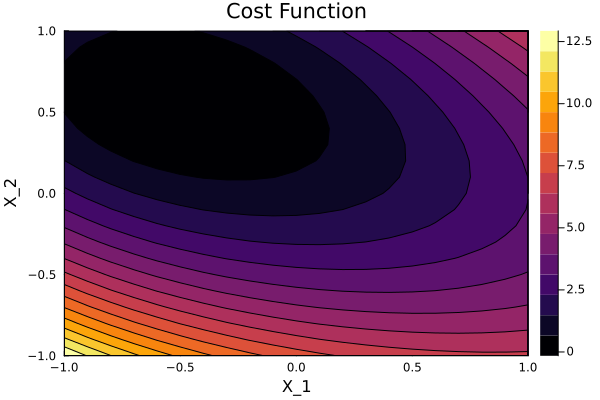

In [7]:
let
    Q = [1.65539  2.89376; 2.89376  6.51521];
    q = [2;-3]
    f(x) = 0.5*x'*Q*x + q'*x + exp(-1.3*x[1] + 0.3*x[2]^2) # cost function 
    contour(-1:.1:1,-1:.1:1, (x1,x2)-> f([x1;x2]),title = "Cost Function",
            xlabel = "X_1", ylabel = "X_2",fill = true)
end

To find the minimum for this cost function $f(x)$, let's write the KKT conditions for optimality:


$$ \nabla f(x) = 0 \quad \quad \text{stationarity}, $$


which we see is just another rootfinding problem. We are now going to use Newton's method on the KKT conditions to find the $x$ in which $\nabla f(x) = 0$.  

In [8]:
@testset "2c" begin 
    Q = [1.65539  2.89376; 2.89376  6.51521];
    q = [2;-3]
    f(x) = 0.5*x'*Q*x + q'*x + exp(-1.3*x[1] + 0.3*x[2]^2)
    
    function kkt_conditions(x)
        # TODO: return the stationarity condition for the cost function f (∇f(x))
        # hint: use forward diff
        return zeros(length(x))
    end
    
    residual_fx(_x) = kkt_conditions(_x)

    x0 = [-0.9512129986081451, 0.8061342694354091]
    X = newtons_method(x0, residual_fx; max_iters = 10)
    R = residual_fx.(X) # the . evaluates the function at each element of the array

    Rp = [[abs(R[i][ii]) for i = 1:length(R)] for ii = 1:length(R[1])] # this gets abs of each term at each iteration
    
    # tests 
    @test norm(R[end])<1e-10; 

    plot(Rp[1],yaxis=:log,ylabel = "|r|",xlabel = "iteration",
         yticks= [1.0*10.0^(-x) for x = float(15:-1:-2)],
         title = "Convergence of Newton's Method on KKT Conditions",label = "|r_1|")
    display(plot!(Rp[2],label = "|r_2|"))
    
end

2c: Error During Test at c:\Users\zsqu4re\Desktop\OCRL\Optimal-Control-and-Reinforcement-Learning\hw0\HW0_S25\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X16sZmlsZQ==.jl:1
  Got exception outside of a @test
  Newton did not converge
  Stacktrace:
    [1] error(s::String)
      @ Base .\error.jl:35
    [2] newtons_method(x0::Vector{Float64}, residual_function::Function; max_iters::Int64)
      @ Main c:\Users\zsqu4re\Desktop\OCRL\Optimal-Control-and-Reinforcement-Learning\hw0\HW0_S25\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X11sZmlsZQ==.jl:26
    [3] macro expansion
      @ c:\Users\zsqu4re\Desktop\OCRL\Optimal-Control-and-Reinforcement-Learning\hw0\HW0_S25\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X16sZmlsZQ==.jl:15 [inlined]
    [4] macro expansion
      @ C:\Users\zsqu4re\.julia\juliaup\julia-1.10.7+0.x64.w64.mingw32\share\julia\stdlib\v1.10\Test\src\Test.jl:1577 [inlined]
    [5] top-level scope
      @ c:\Users\zsqu4re\Desktop\OCRL\Optimal-Control-and-Reinfor

TestSetException: Some tests did not pass: 0 passed, 0 failed, 1 errored, 0 broken.

## Note on Newton's method for unconstrained optimization
To solve the above problem, we used Newton's method on the following equation:

$$ \nabla f(x) = 0 \quad \quad \text{stationarity}, $$

Which results in the following Newton steps:

$$ \Delta x = - \bigg[ \frac{\partial \nabla f(x)}{x} \bigg]^{-1} \nabla f(x_k). $$

The jacobian of the gradient of $f(x)$ is the same as the hessian of $f(x)$ (write this out and convince yourself). This means we can rewrite the Newton step as the equivalent expression:

$$ \Delta x = - [\nabla^2f(x)]^{-1} \nabla f(x_k) $$

What is the interpretation of this? Well, if we take a second order Taylor series of our cost function, and minimize this quadratic approximation of our cost function, we get the following optimization problem:

$$ \min_{\Delta x} \quad \quad f(x_k) + [\nabla f(x_k)^T] \Delta x + \frac{1}{2} \Delta x^T [\nabla^2f(x_k)] \Delta x $$

Where our optimality condition is the following:

$$ \nabla f(x_k)^T +  [\nabla^2f(x_k)] \Delta x = 0 $$ 

And we can solve for $\Delta x$ with the following:

$$ \Delta x = - [\nabla^2f(x)]^{-1} \nabla f(x_k) $$

Which is our Newton step. This means that Newton's method on the stationary condition is the same as minimizing the quadratic approximation of the cost function at each iteration. 